# Лабораторная работа №1 (Pandas)
## Выполнил Сергунин Станислав Константинович, 6133-010402D

In [79]:
import pandas as pd
import numpy as np

Используемый в работе набор данных: https://www.kaggle.com/CooperUnion/anime-recommendations-database

In [80]:
anime = 'data/anime.csv'
rating = 'data/rating.csv'

### Задание 1
Считать в pandas DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу, встроенный датасет sklearn. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [81]:
data = pd.read_csv(anime)

In [82]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [83]:
pd.DataFrame([data.columns, data.dtypes], index=['Column Name', 'Column Type']).T

,Column Name,Column Type
0,anime_id,int64
1,name,object
2,genre,object
3,type,object
4,episodes,object
5,rating,float64
6,members,int64


### Задание 2
Выполните с датафреймом следующие операции (многие операции можно совершить не одним способом, используйте все известные вам способы, поищите/придумайте новые способы)

#### 2.1 Вывод таблицы

In [84]:
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


#### 2.2 Вывод первых n элементов таблицы

In [85]:
data.head(1)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630


#### 2.3 Вывод последних n элементов таблицы

In [86]:
data.tail(1)

,anime_id,name,genre,type,episodes,rating,members
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


#### 2.4 .describe()

In [87]:
data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


#### 2.5 Cчитывание значения конкретной ячейки (с конкретным индексом из конкретной колонки) всеми известными вам способами

In [88]:
data.loc[0, 'episodes']

'1'

In [89]:
data.iloc[0, 0]

32281

#### 2.6 Фильтрация строк по диапазону

In [90]:
data.take(slice(1, 3))

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


In [91]:
data.loc[1:2]

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


#### 2.7 Фильтрация набора данных по какому-либо условию

In [92]:
data.loc[data['genre'] == 'Hentai'].head(9)

,anime_id,name,genre,type,episodes,rating,members
11114,11879,Oni Chichi: Re-born,Hentai,OVA,2,7.89,14342
11115,29575,Mankitsu Happening,Hentai,OVA,4,7.83,8510
11116,15843,Koiito Kinenbi The Animation,Hentai,OVA,2,7.75,6940
11117,21097,Oni Chichi: Rebuild,Hentai,OVA,3,7.75,9825
11119,10779,Eroge! H mo Game mo Kaihatsu Zanmai,Hentai,OVA,6,7.68,20316
11120,10380,Oni Chichi: Re-birth,Hentai,OVA,1,7.65,14925
11122,22069,Swing Out Sisters (2014),Hentai,OVA,1,7.61,5099
11124,12375,Maki-chan to Nau.,Hentai,OVA,4,7.57,9650
11125,3559,Stringendo: Angel-tachi no Private Lesson,Hentai,OVA,12,7.55,7713


#### 2.8. Работа с пропущенными значениями (если они есть): удаление строк с пропущенными значениями, заполнение пропущенных значений средним значением по колонке. Если пропущенных значений нет — намеренно их "генерируете", прибивая какие-то куски данных в np.nan

In [93]:
# instrumentalness was NaN
data.fillna(0).head(1)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630


In [94]:
# instrumentalness was NaN
data.replace(np.NAN, 0).head(1)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630


#### 2.9 Cоздание нового поля вычисленного на основе значений других полей

##### 2.9.1. Через выражение на базе имеющихся колонок

In [95]:
data['members_1'] = data['members']
data.head(1).T

,0
anime_id,32281
name,Kimi no Na wa.
genre,"Drama, Romance, School, Supernatural"
type,Movie
episodes,1
rating,9.37
members,200630
members_1,200630


##### 2.9.2 через DataFrame.apply

In [96]:
data['Trash'] = data.apply(lambda x: x['rating'] / 10, axis=1)

##### 2.9.3 через Series.apply

In [97]:
data['members^2'] = data['members'].apply(lambda x: x ** 2)

In [98]:
data.head()

,anime_id,name,genre,type,episodes,rating,members,members_1,Trash,members^2
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,200630,0.937,40252396900
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,793665,0.926,629904132225
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,114262,0.925,13055804644
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,673572,0.917,453699239184
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,151266,0.916,22881402756


#### 2.10 Cортировка по какому-либо из полей

In [99]:
data.fillna(0).sort_values('members', ascending=False).head(10)

,anime_id,name,genre,type,episodes,rating,members,members_1,Trash,members^2
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,1013917,0.871,1028027682889
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229,896229,0.854,803226420441
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100,893100,0.783,797627610000
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,793665,0.926,629904132225
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796,717796,0.839,515231097616
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151,715151,0.883,511440952801
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297,683297,0.781,466894790209
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,673572,0.917,453699239184
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190,657190,0.807,431898696100
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817,633817,0.845,401723989489


#### 2.11 Вычислить несколько статистик по колонкам 

In [100]:
data['members'].min(), data['members'].max(), data['members'].mean(), data['members'].std()

(5, 1013917, 18071.33886448674, 54820.67692490696)

#### 2.12 .value_counts()

In [101]:
data.value_counts()

anime_id  name                                                       genre                                            type     episodes  rating  members  members_1  Trash  members^2   
1         Cowboy Bebop                                               Action, Adventure, Comedy, Drama, Sci-Fi, Space  TV       26        8.82    486824   486824     0.882  236997606976    1
19069     Okane wa Mawaru: Kurashi to Kinyuu                         Slice of Life                                    OVA      1         5.31    92       92         0.531  8464            1
19021     Takanashi Rikka Kai: Chuunibyou demo Koi ga Shitai! Movie  Comedy, Drama, Romance, School, Slice of Life    Movie    1         7.37    34272    34272      0.737  1174569984      1
19023     Wake Up, Girls!                                            Drama, Music                                     TV       12        7.04    29679    29679      0.704  880843041       1
19029     Yuyushiki: Nyanyashiki                       

#### 2.13 Вывод уникальных значений колонки через .unique()

In [102]:
data['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

#### 2.14 Удалите текущий индекс и создайте новый индекс на базе новой колонки, которая для этого лучше всего подходит

In [103]:
data.index = data['rating']

In [104]:
data.head()

,anime_id,name,genre,type,episodes,rating,members,members_1,Trash,members^2
rating,,,,,,,,,,
9.37,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,200630,0.937,40252396900
9.26,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,793665,0.926,629904132225
9.25,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,114262,0.925,13055804644
9.17,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,673572,0.917,453699239184
9.16,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,151266,0.916,22881402756


### 3. GroupBy
Продемонстрировать работу .groupby, на основе группировок в groupby вычисляете агрегатные функции по одной или нескольким колонкам. Какую информацию о данных вы получили, выполнив данную операцию? Запишите ответ в комментариях.

In [ ]:
среднее по пользователям

In [106]:
result = data[['name','type','members']]\
    .groupby('type')\
    .mean()\
    .sort_values('members', ascending=False)\
    .rename(columns={'members': 'Average members'})

result.head(5)

,Average members
type,
TV,42683.658305
Movie,10360.340716
Special,7676.060859
OVA,5986.139837
ONA,4114.030349


### 4. Pivot

Решейпинг данных 1Dto2D с помощью .pivot (можно подать на вход результаты агрегатов, полученных ранее через .groupby (сгруппировать по двум полям), либо прекрасно заходит сюда данные из SQL сгруппированные предварительно по 2-м полям). Какую информацию о данных вы получили, выполнив данную операцию? Запишите ответ в комментариях.

Ничего дельного не получил

In [111]:
data.groupby('type').mean().pivot(columns='rating', values='rating')

rating,5.588996,5.643298,6.318058,6.375221,6.523501,6.902299
type,,,,,,
Movie,NaN,NaN,6.318058,NaN,NaN,NaN
Music,5.588996,NaN,NaN,NaN,NaN,NaN
ONA,NaN,5.643298,NaN,NaN,NaN,NaN
OVA,NaN,NaN,NaN,6.375221,NaN,NaN
Special,NaN,NaN,NaN,NaN,6.523501,NaN
TV,NaN,NaN,NaN,NaN,NaN,6.902299


### 5. pivot_table
Решейпинг 1Dto2D данных соединённый с группировкой / агрегацией (одним словом — сводная таблица): .pivot_table. Группируем только по категориальным полям или числовым, если уверены, что значений немного! Если значений много, можете вначале из загрубить (см. (2.9.) либо (7)). Перед тем как выполнять задание сформулируйте вопрос, на который собираетесь получить ответ с помощью сводной таблицы. Запишите этот вопрос в комментариях. Какую информацию о данных вы в результате получили? https://pbpython.com/pandas-pivot-table-explained.html

In [113]:
pd.pivot_table(data, index='anime_id')

,Trash,members,members^2,members_1,rating
anime_id,,,,,
1,0.882,486824,236997606976,486824,8.82
5,0.840,137636,18943668496,137636,8.40
6,0.832,283069,80128058761,283069,8.32
7,0.736,64905,4212659025,64905,7.36
8,0.706,9848,96983104,9848,7.06
...,...,...,...,...,...
34514,0.721,295,87025,295,7.21
34519,0.567,94,8836,94,5.67
34522,NaN,381,145161,381,NaN


### 6. Посчитать квантили распределения какого-либо вещественного признака (с помощью numpy.quantile или numpy.percentile)

In [114]:
np.quantile(data['rating'].fillna(0), 0.5)

6.55

### 7. Посчитать гистограмму какого-либо вещественного признака (с помощью numpy.histogram). Значения гистограммы можете использовать как вариант в качестве загрубленного числового признака для заданий (4) или (5).

In [115]:
import matplotlib.pyplot as plt

(array([   6.,   49.,  275.,  733., 1824., 3654., 3822., 1467.,  225.,
           9.]),
 array([ 1.67 ,  2.503,  3.336,  4.169,  5.002,  5.835,  6.668,  7.501,
         8.334,  9.167, 10.   ]),
 <BarContainer object of 10 artists>)

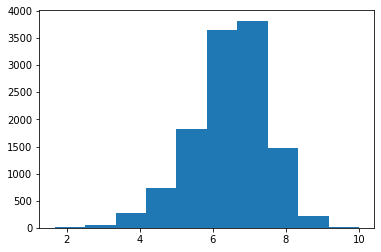

In [116]:
plt.hist(data['rating'])

### 8. Получить DataFrame с MultiIndex любым способом: через конструктор (в документации увидите множество видов конструкторов для создания MultiIndex с нуля), через read_sql / read_csv / readexcel, read*, через pivot_table, через groupby или иными способами.


In [118]:
multi_indexed_data = data.groupby(['name', 'type']).mean()
multi_indexed_data.head()

,,anime_id,rating,members,members_1,Trash,members^2
name,type,,,,,,
&quot;0&quot;,Music,20707.0,5.06,1170.0,1170.0,0.506,1.368900e+06
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",Movie,25627.0,5.00,113.0,113.0,0.500,1.276900e+04
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,OVA,7669.0,7.06,14351.0,14351.0,0.706,2.059512e+08
&quot;Bungaku Shoujo&quot; Memoire,OVA,8481.0,7.54,18013.0,18013.0,0.754,3.244682e+08
&quot;Bungaku Shoujo&quot; Movie,Movie,6408.0,7.63,40984.0,40984.0,0.763,1.679688e+09


### 9. Переставить местами уровни индекса

In [119]:
multi_indexed_data.swaplevel().head()

anime_id  rating  \
type  name                                                                   
Music &quot;0&quot;                                        20707.0    5.06   
Movie &quot;Aesop&quot; no Ohanashi yori: Ushi to Kae...   25627.0    5.00   
OVA   &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...    7669.0    7.06   
      &quot;Bungaku Shoujo&quot; Memoire                    8481.0    7.54   
Movie &quot;Bungaku Shoujo&quot; Movie                      6408.0    7.63   

                                                          members  members_1  \
type  name                                                                     
Music &quot;0&quot;                                        1170.0     1170.0   
Movie &quot;Aesop&quot; no Ohanashi yori: Ushi to Kae...    113.0      113.0   
OVA   &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...  14351.0    14351.0   
      &quot;Bungaku Shoujo&quot; Memoire                  18013.0    18013.0   
Movie &quot;Bungaku Shoujo&quot; Movie                    40984.0    40984.0   

                                                          Trash     members^2  
type  name                                                                     
Music &quot;0&quot;                                       0.506  1.368900e+06  
Movie &quot;Aesop&quot; no Ohanashi yori: Ushi to Kae...  0.500  1.276900e+04  
OVA   &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...  0.706  2.059512e+08  
      &quot;Bungaku Shoujo&quot; Memoire                  0.754  3.244682e+08  
Movie &quot;Bungaku Shoujo&quot; Movie                    0.763  1.679688e+09

In [120]:
multi_indexed_data.swaplevel().sort_index().head()

anime_id  rating  \
type  name                                                                   
Movie &quot;Aesop&quot; no Ohanashi yori: Ushi to Kae...   25627.0    5.00   
      &quot;Bungaku Shoujo&quot; Movie                      6408.0    7.63   
      .hack//G.U. Trilogy                                   3269.0    7.32   
      .hack//The Movie: Sekai no Mukou ni                  11375.0    7.32   
      009 Re:Cyborg                                        11755.0    6.76   

                                                          members  members_1  \
type  name                                                                     
Movie &quot;Aesop&quot; no Ohanashi yori: Ushi to Kae...    113.0      113.0   
      &quot;Bungaku Shoujo&quot; Movie                    40984.0    40984.0   
      .hack//G.U. Trilogy                                 22537.0    22537.0   
      .hack//The Movie: Sekai no Mukou ni                 11617.0    11617.0   
      009 Re:Cyborg                                        8307.0     8307.0   

                                                          Trash     members^2  
type  name                                                                     
Movie &quot;Aesop&quot; no Ohanashi yori: Ushi to Kae...  0.500  1.276900e+04  
      &quot;Bungaku Shoujo&quot; Movie                    0.763  1.679688e+09  
      .hack//G.U. Trilogy                                 0.732  5.079164e+08  
      .hack//The Movie: Sekai no Mukou ni                 0.732  1.349547e+08  
      009 Re:Cyborg                                       0.676  6.900625e+07

### 10. Транспонировать таблицу (или создать новую другую) с MultiIndex

In [121]:
multi_indexed_data.T.head()

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,ēlDLIVE,◯
type,Music,Movie,OVA,OVA,Movie,OVA,OVA,OVA,Movie,Special,...,TV,Music,TV,TV,Movie,OVA,OVA,Movie,TV,ONA
anime_id,20707.000,25627.0,7669.000,8481.000,6408.000,6076.000,33363.000,2928.000,3269.000,4469.000,...,168.000,30909.000,861.000,3091.000,793.000,6864.000,4918.000,29708.000,32878.0,31687.000
rating,5.060,5.0,7.060,7.540,7.630,6.130,7.330,6.910,7.320,6.670,...,7.450,6.050,8.110,8.340,8.040,8.320,8.170,6.170,NaN,4.220
members,1170.000,113.0,14351.000,18013.000,40984.000,805.000,578.000,15412.000,22537.000,7952.000,...,52784.000,134.000,150872.000,74941.000,41547.000,36353.000,40401.000,66.000,6943.0,448.000
members_1,1170.000,113.0,14351.000,18013.000,40984.000,805.000,578.000,15412.000,22537.000,7952.000,...,52784.000,134.000,150872.000,74941.000,41547.000,36353.000,40401.000,66.000,6943.0,448.000
Trash,0.506,0.5,0.706,0.754,0.763,0.613,0.733,0.691,0.732,0.667,...,0.745,0.605,0.811,0.834,0.804,0.832,0.817,0.617,NaN,0.422


### 11. Удалить один из уровней индекса или добавить новый уровень индекса (можно инициализированный константой)


In [122]:
multi_indexed_data.reset_index(level=0)

,name,anime_id,rating,members,members_1,Trash,members^2
type,,,,,,,
Music,&quot;0&quot;,20707.0,5.06,1170.0,1170.0,0.506,1.368900e+06
Movie,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,25627.0,5.00,113.0,113.0,0.500,1.276900e+04
OVA,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,7669.0,7.06,14351.0,14351.0,0.706,2.059512e+08
OVA,&quot;Bungaku Shoujo&quot; Memoire,8481.0,7.54,18013.0,18013.0,0.754,3.244682e+08
Movie,&quot;Bungaku Shoujo&quot; Movie,6408.0,7.63,40984.0,40984.0,0.763,1.679688e+09
...,...,...,...,...,...,...,...
OVA,xxxHOLiC Rou,6864.0,8.32,36353.0,36353.0,0.832,1.321541e+09
OVA,xxxHOLiC Shunmuki,4918.0,8.17,40401.0,40401.0,0.817,1.632241e+09
Movie,Üks Uks,29708.0,6.17,66.0,66.0,0.617,4.356000e+03


### 12. Продемонстировать работу .merge

In [123]:
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})

In [124]:
df1.merge(df2, how='outer')

,a,b,c
0,foo,1.0,3.0
1,bar,2.0,NaN
2,baz,NaN,4.0


### 13. Продемонстрировать работу с .concat или append

In [125]:
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'b': [3, 4]})

In [126]:
df1.append(df2, ignore_index=True)

,a,b
0,foo,1
1,bar,2
2,foo,3
3,baz,4


In [127]:
pd.concat([df1, df2], axis=0, ignore_index=True)

,a,b
0,foo,1
1,bar,2
2,foo,3
3,baz,4


### 14. Проитерировать dataframe построчно .iterrows(). Выполните что-то имеющее смысл внутри цикла


In [133]:
classes = np.arange(1, 100).tolist()
for i, (index, row) in enumerate(data.iterrows()):
    if row['episodes'] not in classes:
        print(f'Unkown name encountered in the {i}th row')

Unkown name encountered in the 0th row
Unkown name encountered in the 1th row
Unkown name encountered in the 2th row
Unkown name encountered in the 3th row
Unkown name encountered in the 4th row
Unkown name encountered in the 5th row
Unkown name encountered in the 6th row
Unkown name encountered in the 7th row
Unkown name encountered in the 8th row
Unkown name encountered in the 9th row
Unkown name encountered in the 10th row
Unkown name encountered in the 11th row
Unkown name encountered in the 12th row
Unkown name encountered in the 13th row
Unkown name encountered in the 14th row
Unkown name encountered in the 15th row
Unkown name encountered in the 16th row
Unkown name encountered in the 17th row
Unkown name encountered in the 18th row
Unkown name encountered in the 19th row
Unkown name encountered in the 20th row
Unkown name encountered in the 21th row
Unkown name encountered in the 22th row
Unkown name encountered in the 23th row
Unkown name encountered in the 24th row
Unkown nam

Unkown name encountered in the 1510th row
Unkown name encountered in the 1511th row
Unkown name encountered in the 1512th row
Unkown name encountered in the 1513th row
Unkown name encountered in the 1514th row
Unkown name encountered in the 1515th row
Unkown name encountered in the 1516th row
Unkown name encountered in the 1517th row
Unkown name encountered in the 1518th row
Unkown name encountered in the 1519th row
Unkown name encountered in the 1520th row
Unkown name encountered in the 1521th row
Unkown name encountered in the 1522th row
Unkown name encountered in the 1523th row
Unkown name encountered in the 1524th row
Unkown name encountered in the 1525th row
Unkown name encountered in the 1526th row
Unkown name encountered in the 1527th row
Unkown name encountered in the 1528th row
Unkown name encountered in the 1529th row
Unkown name encountered in the 1530th row
Unkown name encountered in the 1531th row
Unkown name encountered in the 1532th row
Unkown name encountered in the 153

Unkown name encountered in the 3242th row
Unkown name encountered in the 3243th row
Unkown name encountered in the 3244th row
Unkown name encountered in the 3245th row
Unkown name encountered in the 3246th row
Unkown name encountered in the 3247th row
Unkown name encountered in the 3248th row
Unkown name encountered in the 3249th row
Unkown name encountered in the 3250th row
Unkown name encountered in the 3251th row
Unkown name encountered in the 3252th row
Unkown name encountered in the 3253th row
Unkown name encountered in the 3254th row
Unkown name encountered in the 3255th row
Unkown name encountered in the 3256th row
Unkown name encountered in the 3257th row
Unkown name encountered in the 3258th row
Unkown name encountered in the 3259th row
Unkown name encountered in the 3260th row
Unkown name encountered in the 3261th row
Unkown name encountered in the 3262th row
Unkown name encountered in the 3263th row
Unkown name encountered in the 3264th row
Unkown name encountered in the 326

Unkown name encountered in the 4578th row
Unkown name encountered in the 4579th row
Unkown name encountered in the 4580th row
Unkown name encountered in the 4581th row
Unkown name encountered in the 4582th row
Unkown name encountered in the 4583th row
Unkown name encountered in the 4584th row
Unkown name encountered in the 4585th row
Unkown name encountered in the 4586th row
Unkown name encountered in the 4587th row
Unkown name encountered in the 4588th row
Unkown name encountered in the 4589th row
Unkown name encountered in the 4590th row
Unkown name encountered in the 4591th row
Unkown name encountered in the 4592th row
Unkown name encountered in the 4593th row
Unkown name encountered in the 4594th row
Unkown name encountered in the 4595th row
Unkown name encountered in the 4596th row
Unkown name encountered in the 4597th row
Unkown name encountered in the 4598th row
Unkown name encountered in the 4599th row
Unkown name encountered in the 4600th row
Unkown name encountered in the 460

Unkown name encountered in the 6279th row
Unkown name encountered in the 6280th row
Unkown name encountered in the 6281th row
Unkown name encountered in the 6282th row
Unkown name encountered in the 6283th row
Unkown name encountered in the 6284th row
Unkown name encountered in the 6285th row
Unkown name encountered in the 6286th row
Unkown name encountered in the 6287th row
Unkown name encountered in the 6288th row
Unkown name encountered in the 6289th row
Unkown name encountered in the 6290th row
Unkown name encountered in the 6291th row
Unkown name encountered in the 6292th row
Unkown name encountered in the 6293th row
Unkown name encountered in the 6294th row
Unkown name encountered in the 6295th row
Unkown name encountered in the 6296th row
Unkown name encountered in the 6297th row
Unkown name encountered in the 6298th row
Unkown name encountered in the 6299th row
Unkown name encountered in the 6300th row
Unkown name encountered in the 6301th row
Unkown name encountered in the 630

Unkown name encountered in the 7830th row
Unkown name encountered in the 7831th row
Unkown name encountered in the 7832th row
Unkown name encountered in the 7833th row
Unkown name encountered in the 7834th row
Unkown name encountered in the 7835th row
Unkown name encountered in the 7836th row
Unkown name encountered in the 7837th row
Unkown name encountered in the 7838th row
Unkown name encountered in the 7839th row
Unkown name encountered in the 7840th row
Unkown name encountered in the 7841th row
Unkown name encountered in the 7842th row
Unkown name encountered in the 7843th row
Unkown name encountered in the 7844th row
Unkown name encountered in the 7845th row
Unkown name encountered in the 7846th row
Unkown name encountered in the 7847th row
Unkown name encountered in the 7848th row
Unkown name encountered in the 7849th row
Unkown name encountered in the 7850th row
Unkown name encountered in the 7851th row
Unkown name encountered in the 7852th row
Unkown name encountered in the 785

Unkown name encountered in the 9336th row
Unkown name encountered in the 9337th row
Unkown name encountered in the 9338th row
Unkown name encountered in the 9339th row
Unkown name encountered in the 9340th row
Unkown name encountered in the 9341th row
Unkown name encountered in the 9342th row
Unkown name encountered in the 9343th row
Unkown name encountered in the 9344th row
Unkown name encountered in the 9345th row
Unkown name encountered in the 9346th row
Unkown name encountered in the 9347th row
Unkown name encountered in the 9348th row
Unkown name encountered in the 9349th row
Unkown name encountered in the 9350th row
Unkown name encountered in the 9351th row
Unkown name encountered in the 9352th row
Unkown name encountered in the 9353th row
Unkown name encountered in the 9354th row
Unkown name encountered in the 9355th row
Unkown name encountered in the 9356th row
Unkown name encountered in the 9357th row
Unkown name encountered in the 9358th row
Unkown name encountered in the 935

Unkown name encountered in the 10877th row
Unkown name encountered in the 10878th row
Unkown name encountered in the 10879th row
Unkown name encountered in the 10880th row
Unkown name encountered in the 10881th row
Unkown name encountered in the 10882th row
Unkown name encountered in the 10883th row
Unkown name encountered in the 10884th row
Unkown name encountered in the 10885th row
Unkown name encountered in the 10886th row
Unkown name encountered in the 10887th row
Unkown name encountered in the 10888th row
Unkown name encountered in the 10889th row
Unkown name encountered in the 10890th row
Unkown name encountered in the 10891th row
Unkown name encountered in the 10892th row
Unkown name encountered in the 10893th row
Unkown name encountered in the 10894th row
Unkown name encountered in the 10895th row
Unkown name encountered in the 10896th row
Unkown name encountered in the 10897th row
Unkown name encountered in the 10898th row
Unkown name encountered in the 10899th row
Unkown name